##### 读取movie.csv文件并生成相应的Dataframe

In [2]:
import pandas as pd

In [3]:
url = "movie.csv"
df = pd.read_csv(url)

##### 分析并输出该Dataframe中各列的数据类型

In [4]:
df.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

##### 应用数据Selection和loc (或iloc)方法选择所有类型为非数值的列，并生成新的Dataframe

In [5]:
non_numeric_cols = [col for col in df.columns if not pd.api.types.is_numeric_dtype(df[col])]
non_numeric_df = df.loc[:, non_numeric_cols]

In [6]:
non_numeric_df.dtypes

color              object
director_name      object
actor_2_name       object
genres             object
actor_1_name       object
movie_title        object
actor_3_name       object
plot_keywords      object
movie_imdb_link    object
language           object
country            object
content_rating     object
dtype: object

##### 编写适当的数据filtering条件，将2000年以后美国出品的语言为English的题材(genres)包含Action的彩色电影选择出来，并生成新的Dataframe

In [7]:
columns_to_convert = non_numeric_cols
df[columns_to_convert] = df[columns_to_convert].astype('string')

In [8]:
non_numeric_df = df.loc[:, non_numeric_cols]
non_numeric_df.dtypes

color              string[python]
director_name      string[python]
actor_2_name       string[python]
genres             string[python]
actor_1_name       string[python]
movie_title        string[python]
actor_3_name       string[python]
plot_keywords      string[python]
movie_imdb_link    string[python]
language           string[python]
country            string[python]
content_rating     string[python]
dtype: object

In [13]:
newDf = df[
    (df['title_year'] > 2000) &
    (df['country'] == 'USA') &
    (df['language'] == 'English') &
    (df['genres'].str.contains('Action')) &
    (df['color'] == 'Color')
].copy()

In [14]:
newDf.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0


##### 自定义函数并应用apply和applymap（新函数map）方法将缺失的数值填充为所在列的平均值(mean)，将缺失的名义值填充为众数(mode)

In [18]:
def fill_missing_values(column):
    if pd.api.types.is_numeric_dtype(column):
        return column.fillna(column.mean())
    else:
        return column.fillna(column.mode()[0])

In [19]:
df_filled = df.apply(fill_missing_values)
df_filled.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.000000,178.000000,0.0,855.000000,Joel David Moore,1000.0,7.605058e+08,Action|Adventure|Fantasy|Sci-Fi,...,3054.000000,English,USA,PG-13,2.370000e+08,2009.000000,936.0,7.9,1.780000,33000
1,Color,Gore Verbinski,302.000000,169.000000,563.0,1000.000000,Orlando Bloom,40000.0,3.094042e+08,Action|Adventure|Fantasy,...,1238.000000,English,USA,PG-13,3.000000e+08,2007.000000,5000.0,7.1,2.350000,0
2,Color,Sam Mendes,602.000000,148.000000,0.0,161.000000,Rory Kinnear,11000.0,2.000742e+08,Action|Adventure|Thriller,...,994.000000,English,UK,PG-13,2.450000e+08,2015.000000,393.0,6.8,2.350000,85000
3,Color,Christopher Nolan,813.000000,164.000000,22000.0,23000.000000,Christian Bale,27000.0,4.481306e+08,Action|Thriller,...,2701.000000,English,USA,PG-13,2.500000e+08,2012.000000,23000.0,8.5,2.350000,164000
4,Color,Doug Walker,137.988905,107.090798,131.0,631.276313,Rob Walker,131.0,4.764451e+07,Documentary,...,267.668846,English,USA,R,3.654749e+07,2002.447609,12.0,7.1,2.222349,0


##### 应用GroupBy和agg方法按照电影的不同年份和题材分组，并对投票的用户数(num_voted_users)和评论的用户数(num_user_for_reviews)进行汇总，并生成新的Dataframe选择条件是内容分级为PG-13 ，并导出为csv文件

In [20]:
pg13_df = df[df['content_rating'] == 'PG-13'].copy()

In [22]:
result_df = pg13_df.groupby(['title_year', 'genres']).agg(
    total_voted_users=('num_voted_users', 'sum'),
    avg_voted_users=('num_voted_users', 'mean'),
    total_reviews=('num_user_for_reviews', 'sum'),
    avg_reviews=('num_user_for_reviews', 'mean'),
    movie_count=('num_voted_users', 'count')
).reset_index()

In [23]:
result_df

,title_year,genres,total_voted_users,avg_voted_users,total_reviews,avg_reviews,movie_count
0,1965.0,Drama|Romance|War,55816,55816.0,255.0,255.0,1
1,1968.0,Western,216005,216005.0,565.0,565.0,1
2,1969.0,Comedy|Drama|Musical|Romance|Western,9352,9352.0,106.0,106.0,1
3,1978.0,Musical|Romance,170027,170027.0,350.0,350.0,1
4,1983.0,Crime|Drama,57363,57363.0,308.0,308.0,1
...,...,...,...,...,...,...,...
1031,2016.0,Drama|Horror|Mystery|Sci-Fi|Thriller,126893,126893.0,440.0,440.0,1
1032,2016.0,Drama|Horror|Thriller,12983,12983.0,139.0,139.0,1
1033,2016.0,Drama|Romance,44723,44723.0,130.0,130.0,1
1034,2016.0,Horror,13523,13523.0,95.0,95.0,1


In [25]:
result_df.to_csv('movie_analysis_pg13.csv', encoding="utf-8")

##### 应用Pandas可视化方法生成不同国家出品的内容分级为PG-13的电影数量的柱状图，并将其保存为png文件。（提示：选择条件是内容分级为PG-13，横轴是国家，纵轴是数量）

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

In [29]:
country_counts = pg13_df['country'].value_counts()

In [31]:
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

Text(0, 0.5, '电影数量')

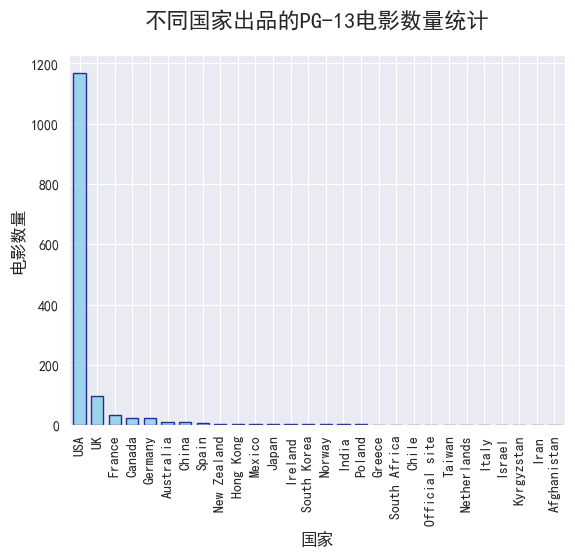

In [33]:
ax = country_counts.plot(kind='bar', color='skyblue', edgecolor='navy', alpha=0.8, width=0.7)
plt.title('不同国家出品的PG-13电影数量统计', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('国家', fontsize=12, fontweight='bold')
plt.ylabel('电影数量', fontsize=12, fontweight='bold')

In [36]:
plt.savefig('pg13_movies_by_country.png', dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>